## Fraud Detection

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
df = pd.read_csv("/content/creditcard.csv", engine='python', on_bad_lines='skip')

print(df.head())

  Time                  V1        V2                V3                  V4  \
0    0    -1.3598071336738 -0.072781  2.53634673796914    1.37815522427443   
1    0    1.19185711131486  0.266151  0.16648011335321   0.448154078460911   
2    1   -1.35835406159823 -1.340163  1.77320934263119   0.379779593034328   
3    1  -0.966271711572087 -0.185226  1.79299333957872  -0.863291275036453   
4    2   -1.15823309349523  0.877737    1.548717846511   0.403033933955121   

                    V5                   V6        V7                  V8  \
0   -0.338320769942518    0.462387777762292  0.239599  0.0986979012610507   
1   0.0600176492822243  -0.0823608088155687 -0.078803  0.0851016549148104   
2   -0.503198133318193     1.80049938079263  0.791461   0.247675786588991   
3  -0.0103088796030823     1.24720316752486  0.237609   0.377435874652262   
4   -0.407193377311653   0.0959214624684256  0.592941  -0.270532677192282   

                   V9  ...       V21                  V22       V23 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555529 entries, 0 to 555528
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    555529 non-null  object 
 1   V1      555529 non-null  object 
 2   V2      555529 non-null  float64
 3   V3      555528 non-null  object 
 4   V4      555528 non-null  object 
 5   V5      555526 non-null  object 
 6   V6      555523 non-null  object 
 7   V7      555523 non-null  float64
 8   V8      555520 non-null  object 
 9   V9      555518 non-null  object 
 10  V10     555516 non-null  float64
 11  V11     555512 non-null  float64
 12  V12     555511 non-null  float64
 13  V13     555506 non-null  float64
 14  V14     555503 non-null  object 
 15  V15     555500 non-null  object 
 16  V16     555493 non-null  object 
 17  V17     555483 non-null  object 
 18  V18     555482 non-null  float64
 19  V19     555477 non-null  float64
 20  V20     555470 non-null  object 
 21  V21     55

In [8]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,1
V4,1
V5,3
V6,6
V7,6
V8,9
V9,11


In [9]:
df.shape

(555529, 31)

In [10]:
#Fraud vs Normal Transactions
df['Class'].value_counts()

,count
Class,
0.0,554467
1.0,928


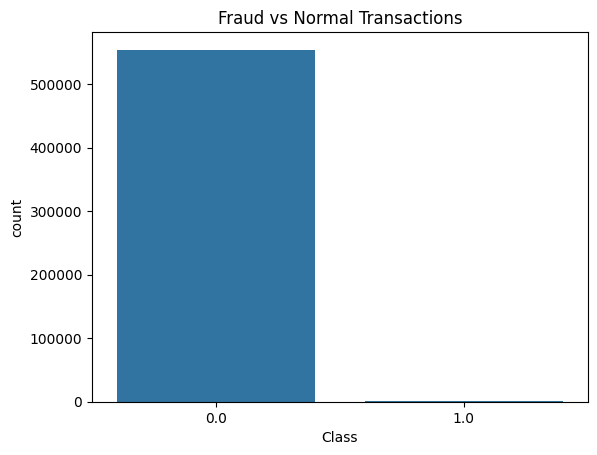

In [11]:
plt.figure()
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Normal Transactions")
plt.show()

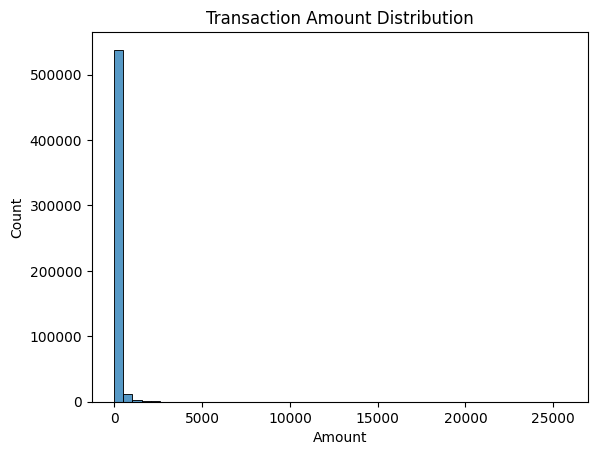

In [12]:
plt.figure()
sns.histplot(df['Amount'], bins=50)
plt.title("Transaction Amount Distribution")
plt.show()

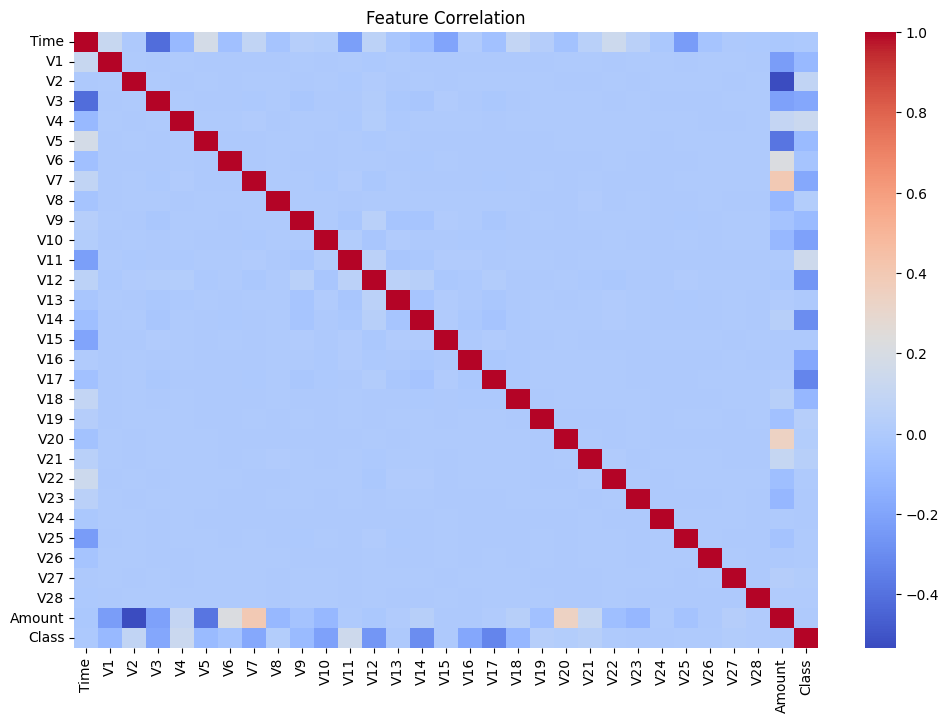

In [15]:
object_cols = df.select_dtypes(include=['object']).columns

for col in object_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(inplace=True)

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

In [16]:
X = df.drop(columns=['Class'])
y = df['Class']

In [17]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [19]:
#Model 1 — Logistic Regression
lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.9992797918598475
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    110909
         1.0       0.86      0.63      0.73       170

    accuracy                           1.00    111079
   macro avg       0.93      0.81      0.86    111079
weighted avg       1.00      1.00      1.00    111079



In [20]:
#Model 2 — Decision Tree
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.9998199479649619
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    110909
         1.0       0.93      0.95      0.94       170

    accuracy                           1.00    111079
   macro avg       0.97      0.98      0.97    111079
weighted avg       1.00      1.00      1.00    111079



In [21]:
#Model 3 — Neural Network
nn = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=20)

nn.fit(X_train, y_train)

nn_pred = nn.predict(X_test)

print("Neural Network Accuracy:", accuracy_score(y_test, nn_pred))
print(classification_report(y_test, nn_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Accuracy: 0.9996218907264199
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    110909
         1.0       0.90      0.85      0.87       170

    accuracy                           1.00    111079
   macro avg       0.95      0.92      0.94    111079
weighted avg       1.00      1.00      1.00    111079



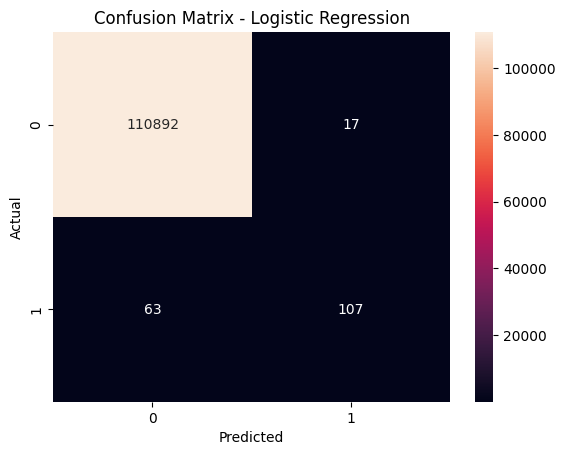

In [22]:
cm = confusion_matrix(y_test, lr_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
print("Logistic Regression:", accuracy_score(y_test, lr_pred))
print("Decision Tree:", accuracy_score(y_test, dt_pred))
print("Neural Network:", accuracy_score(y_test, nn_pred))

Logistic Regression: 0.9992797918598475
Decision Tree: 0.9998199479649619
Neural Network: 0.9996218907264199


In [24]:
sample = X_test[0].reshape(1,-1)

prediction = lr.predict(sample)

if prediction[0] == 1:
    print("Fraudulent Transaction Detected")
else:
    print("Legitimate Transaction")

Legitimate Transaction
